In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("Billionaire.csv")
data.head(10)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
5,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,$93 B,United States,software,7,76.0,Technology
7,Larry Page,$91.5 B,United States,Google,8,48.0,Technology
8,Sergey Brin,$89 B,United States,Google,9,47.0,Technology
9,Mukesh Ambani,$84.5 B,India,diversified,10,63.0,Diversified


In [3]:
# preprocessing 
# first check null values ?

data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [4]:
# ommit 79 number of NAN data
data = data.dropna()
data.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

In [5]:
# preprocessing 
# second : convert NetWorth values to string  ( ommit $ and B )

 
'''
# strip function : cleaning 
text = "    hello world   " 
text.strip() 
output = "hello world"
# delete spaces and enters "by default"

'''

data['NetWorth'] = data["NetWorth"].str.strip("$")
data['NetWorth'] = data["NetWorth"].str.strip("B")
data["NetWorth"] = data["NetWorth"].astype(float)

data.head(10)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


# Main process

In [6]:
# sort datas 

# decending
df = data.sort_values( by= ["NetWorth"] , ascending=True)
df

,Name,NetWorth,Country,Source,Rank,Age,Industry
2754,Zhou Wei family,1.0,China,Software,2674,54.0,Technology
2694,Hou Jianbin,1.0,China,education,2674,39.0,Service
2695,Hur Young-in,1.0,South Korea,"bakeries, fast food",2674,71.0,Food & Beverage
2696,Jiang Long,1.0,China,Manufacturing,2674,47.0,Technology
2697,Morris Kahn,1.0,Israel,software,2674,91.0,Technology
...,...,...,...,...,...,...,...
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive


In [7]:
# ascending
df = data.sort_values( by= ["NetWorth"] , ascending=False).head(10).reset_index()
df

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


<BarContainer object of 10 artists>

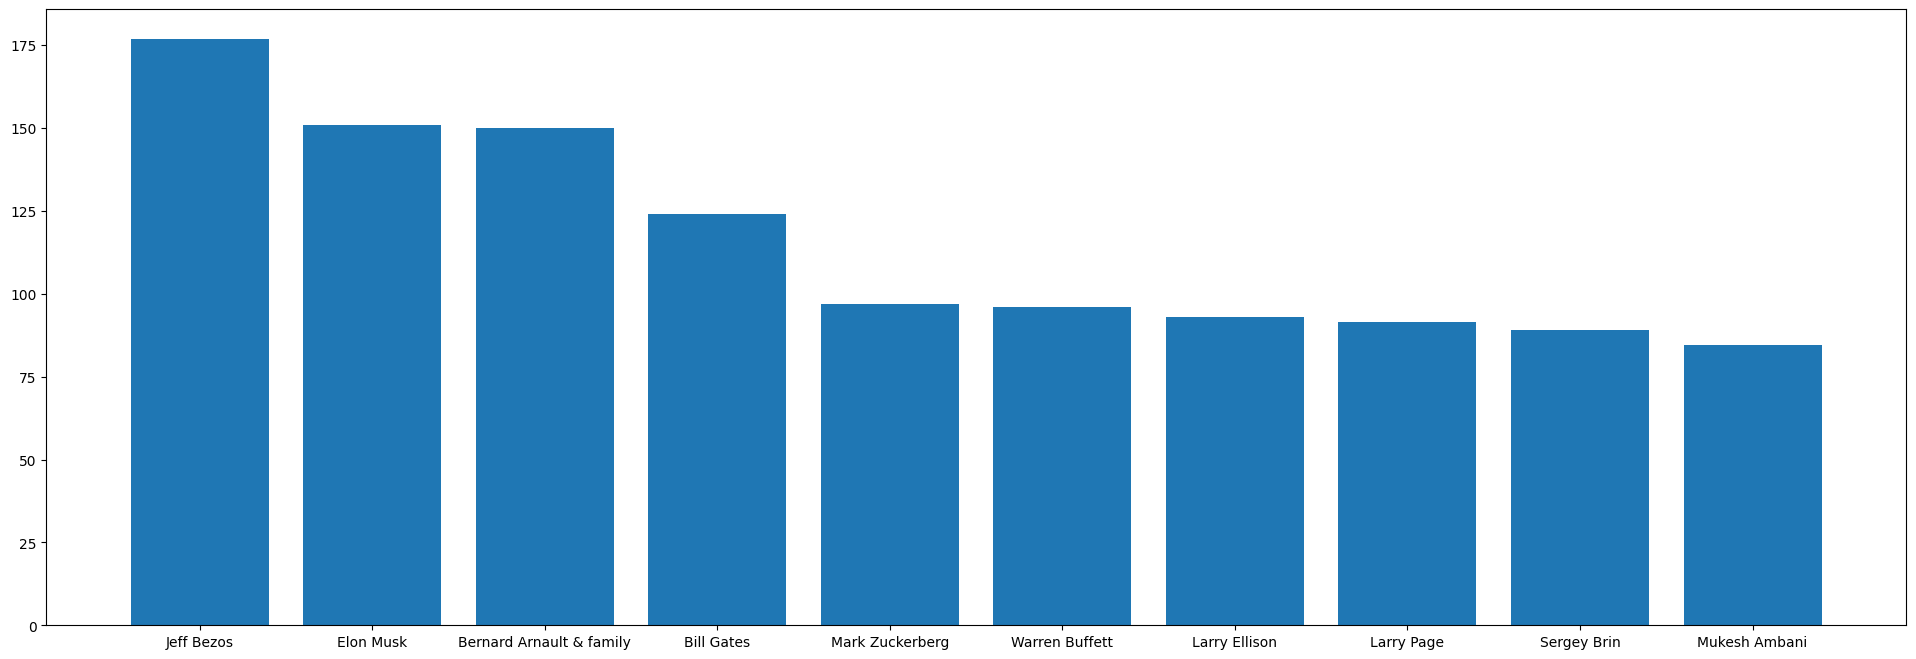

In [8]:
plt.figure(figsize=(24,8))
plt.bar(df["Name"] , df["NetWorth"])

In [9]:
# in which field  and source they are Billionaire ? 

In [10]:
df = data["Source"].value_counts().head(10).reset_index()
df

,index,Source
0,real estate,169
1,pharmaceuticals,96
2,investments,89
3,diversified,78
4,software,61
5,retail,44
6,hedge funds,42
7,private equity,35
8,consumer goods,32
9,chemicals,32


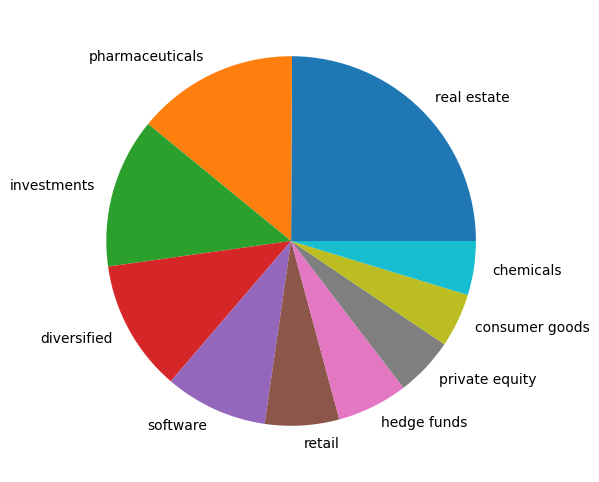

In [11]:
plt.figure(figsize=(6,6))
plt.pie(df["Source"] , labels=df["index"])
plt.show()


# Industries which Billionaires are Active in :

In [12]:
df  = data["Industry"].value_counts().reset_index()

df

,index,Industry
0,Finance & Investments,365
1,Technology,355
2,Manufacturing,317
3,Fashion & Retail,268
4,Healthcare,213
5,Real Estate,211
6,Food & Beverage,204
7,Diversified,180
8,Energy,99
9,Media & Entertainment,92


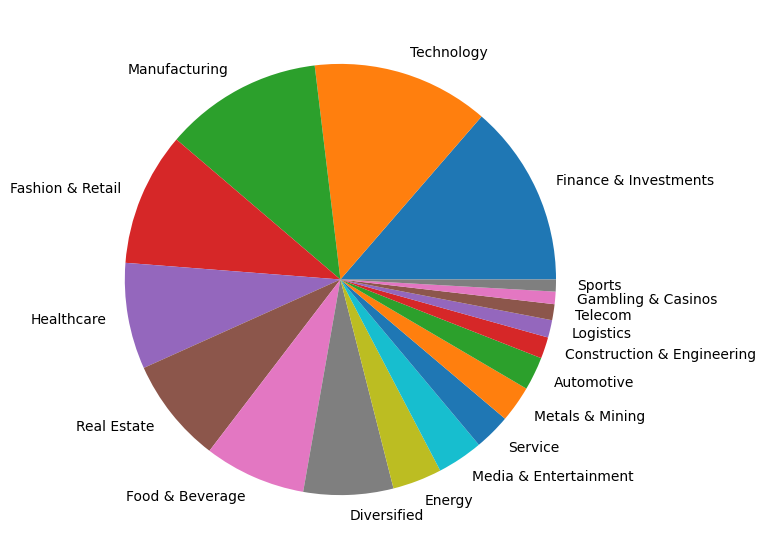

In [13]:
plt.figure(figsize=(7,7))
plt.pie(df["Industry"] , labels= df["index"])
plt.show()

# In which countries do the billionaIre lives ?

In [14]:
df  = data["Country"].value_counts().head(6).reset_index()

df 

,index,Country
0,United States,720
1,China,610
2,India,134
3,Russia,118
4,Germany,115
5,Hong Kong,68


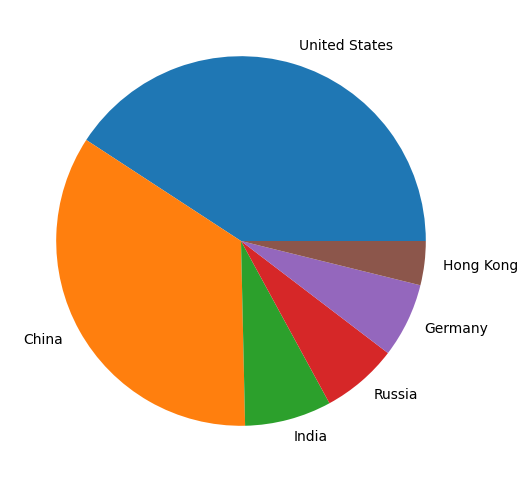

In [15]:
plt.figure(figsize=(6,6))
plt.pie(df["Country"] , labels= df["index"])
plt.show()